In [1]:
# Cell 1: Imports for visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)
colors = sns.color_palette("mako", 8)
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 100


In [2]:
# Cell 2: Manual metrics entry based on your results
batch1_metrics = {
    'train_loss': [0.4827, 0.1764, 0.1036, 0.0790, 0.0655, 0.0614, 0.0544],
    'loss': [0.2680, 0.1008, 0.0848, 0.0750, 0.0792, 0.0723, 0.0698],
    'micro_f1': [0.7490, 0.9031, 0.9315, 0.9367, 0.9437, 0.9404, 0.9398],
    'macro_f1': [0.2659, 0.5927, 0.7845, 0.8414, 0.8703, 0.8678, 0.8687],
    'weighted_f1': [0.7411, 0.9058, 0.9311, 0.9368, 0.9430, 0.9400, 0.9397],
    'samples_f1': [0.7641, 0.9139, 0.9322, 0.9394, 0.9471, 0.9430, 0.9415],
    'samples_precision': [0.7523, 0.9011, 0.9291, 0.9365, 0.9441, 0.9404, 0.9394],
    'samples_recall': [0.7930, 0.9399, 0.9394, 0.9465, 0.9549, 0.9502, 0.9474]
}

# Compile all metrics into a dictionary
manual_metrics = {
    1: batch1_metrics
}


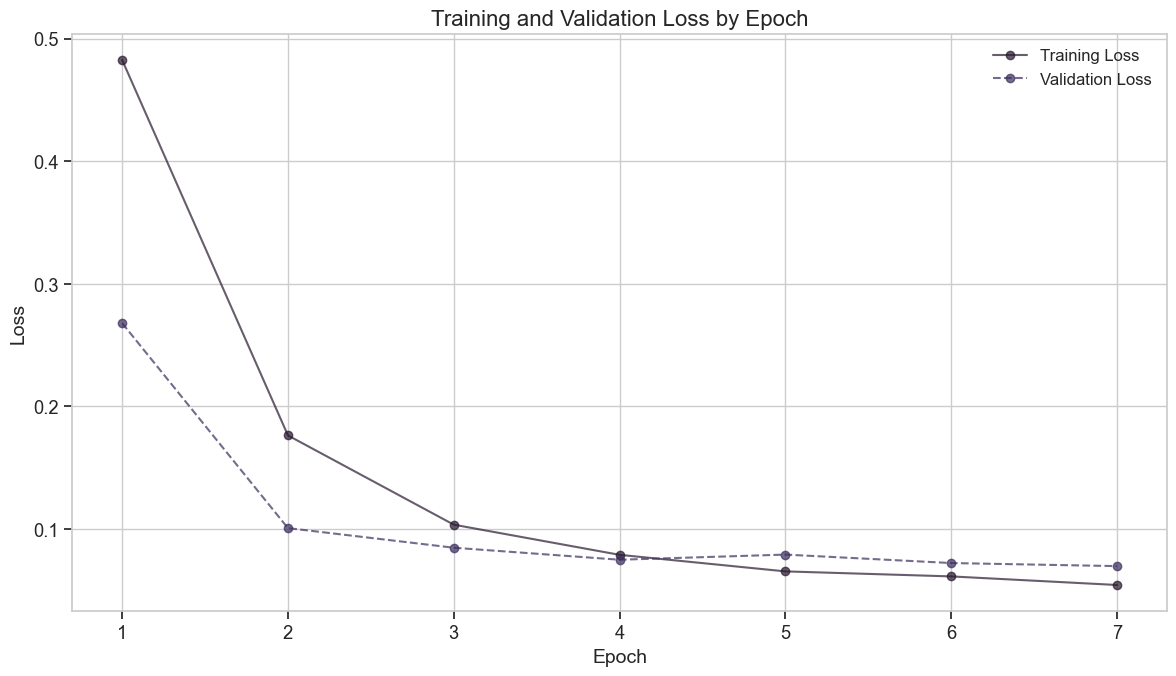

In [3]:
# Cell 3: Plot training and validation loss
def plot_loss_curves(metrics_data):
    """Plot training and validation loss for each batch"""
    fig, ax = plt.subplots(figsize=(12, 7))
    
    for batch_num, data in metrics_data.items():
        if 'train_loss' not in data or 'loss' not in data:
            continue
            
        epochs = range(1, len(data['train_loss']) + 1)
        ax.plot(epochs, data['train_loss'], 'o-', label=f'Training Loss', color=colors[0], alpha=0.7)
        
        if len(data['loss']) > 0:
            val_epochs = range(1, len(data['loss']) + 1)
            ax.plot(val_epochs, data['loss'], 'o--', label=f'Validation Loss', color=colors[1], alpha=0.7)
    
    ax.set_title('Training and Validation Loss by Epoch', fontsize=16)
    ax.set_xlabel('Epoch', fontsize=14)
    ax.set_ylabel('Loss', fontsize=14)
    ax.legend(fontsize=12)
    ax.grid(True)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.tight_layout()
    plt.show()

# Plot loss curves using manual metrics
plot_loss_curves(manual_metrics)

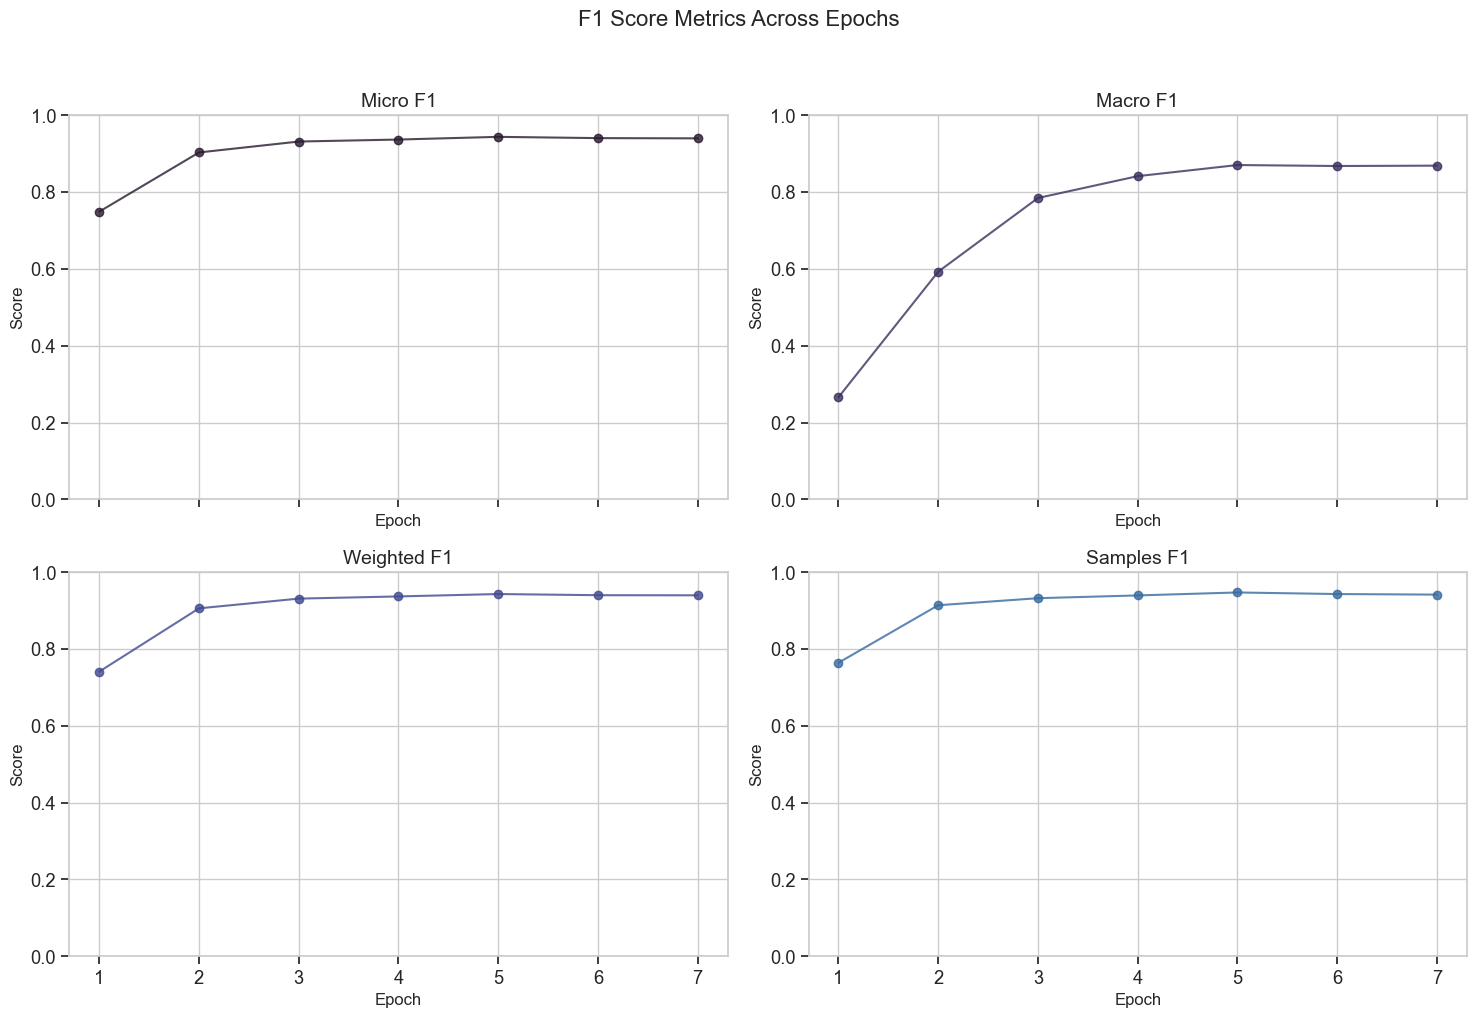

In [4]:
# Cell 4: Plot F1 score metrics
def plot_f1_metrics(metrics_data):
    """Plot different F1 score metrics for each batch"""
    metrics = ['micro_f1', 'macro_f1', 'weighted_f1', 'samples_f1']
    metric_names = ['Micro F1', 'Macro F1', 'Weighted F1', 'Samples F1']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
    axes = axes.flatten()
    
    for i, (metric, name) in enumerate(zip(metrics, metric_names)):
        for batch_num, data in metrics_data.items():
            if metric not in data or len(data[metric]) == 0:
                continue
                
            epochs = range(1, len(data[metric]) + 1)
            axes[i].plot(epochs, data[metric], 'o-', label=f'Batch {batch_num}', color=colors[i], alpha=0.8)
        
        axes[i].set_title(name, fontsize=14)
        axes[i].set_xlabel('Epoch', fontsize=12)
        axes[i].set_ylabel('Score', fontsize=12)
        axes[i].grid(True)
        axes[i].set_ylim(0, 1.0)  # F1 scores are between 0 and 1
        axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.suptitle('F1 Score Metrics Across Epochs', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Plot F1 metrics using manual metrics
plot_f1_metrics(manual_metrics)

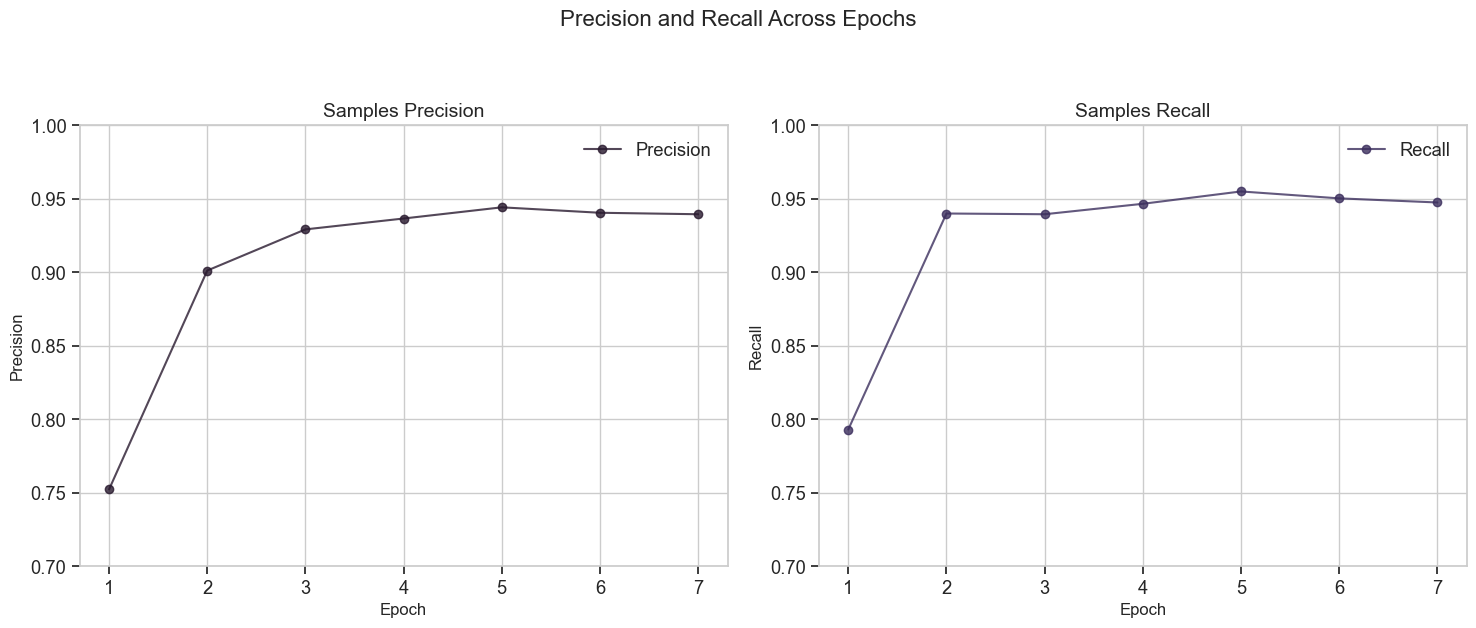

In [5]:
# Cell 5: Plot precision and recall
def plot_precision_recall(metrics_data):
    """Plot precision and recall metrics for each batch"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    for batch_num, data in metrics_data.items():
        if 'samples_precision' not in data or 'samples_recall' not in data:
            continue
            
        epochs = range(1, len(data['samples_precision']) + 1)
        axes[0].plot(epochs, data['samples_precision'], 'o-', label=f'Precision', color=colors[0], alpha=0.8)
        
        recall_epochs = range(1, len(data['samples_recall']) + 1)
        axes[1].plot(recall_epochs, data['samples_recall'], 'o-', label=f'Recall', color=colors[1], alpha=0.8)
    
    axes[0].set_title('Samples Precision', fontsize=14)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Precision', fontsize=12)
    axes[0].grid(True)
    axes[0].set_ylim(0.7, 1.0)  # Adjusted to focus on the relevant range
    axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))
    axes[0].legend()
    
    axes[1].set_title('Samples Recall', fontsize=14)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Recall', fontsize=12)
    axes[1].grid(True)
    axes[1].set_ylim(0.7, 1.0)  # Adjusted to focus on the relevant range
    axes[1].xaxis.set_major_locator(MaxNLocator(integer=True))
    axes[1].legend()
    
    plt.suptitle('Precision and Recall Across Epochs', fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

# Plot precision and recall using manual metrics
plot_precision_recall(manual_metrics)

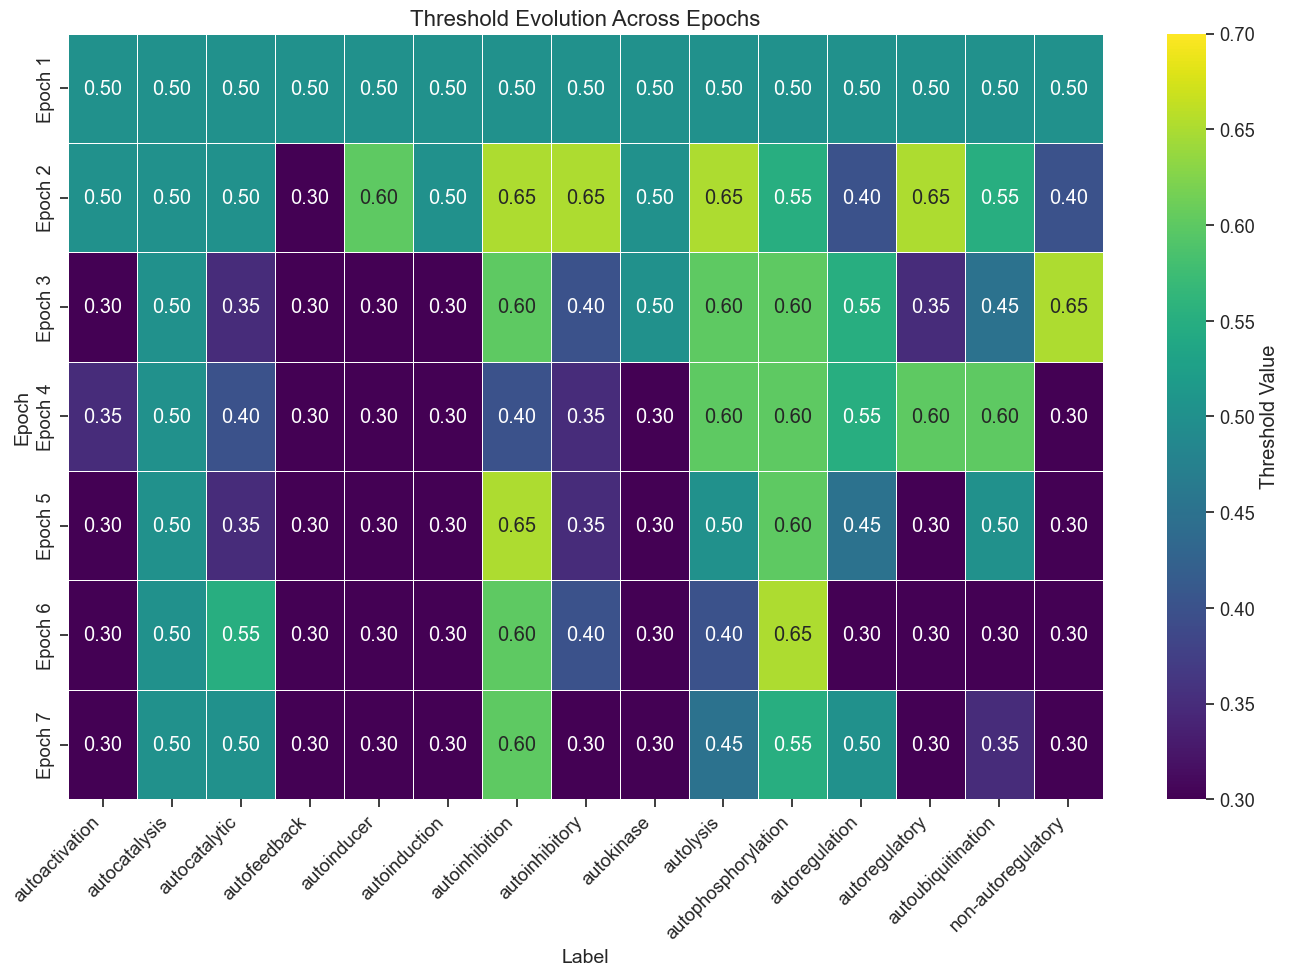

In [6]:
# Cell 6: Plot threshold evolution across epochs
def plot_threshold_evolution():
    """Plot how thresholds evolved across epochs"""
    # Extract thresholds from your results
    epoch_thresholds = [
        [0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50, 0.50],  # Initial
        [0.50, 0.50, 0.50, 0.30, 0.60, 0.50, 0.65, 0.65, 0.50, 0.65, 0.55, 0.40, 0.65, 0.55, 0.40],  # Epoch 2
        [0.30, 0.50, 0.35, 0.30, 0.30, 0.30, 0.60, 0.40, 0.50, 0.60, 0.60, 0.55, 0.35, 0.45, 0.65],  # Epoch 3
        [0.35, 0.50, 0.40, 0.30, 0.30, 0.30, 0.40, 0.35, 0.30, 0.60, 0.60, 0.55, 0.60, 0.60, 0.30],  # Epoch 4
        [0.30, 0.50, 0.35, 0.30, 0.30, 0.30, 0.65, 0.35, 0.30, 0.50, 0.60, 0.45, 0.30, 0.50, 0.30],  # Epoch 5
        [0.30, 0.50, 0.55, 0.30, 0.30, 0.30, 0.60, 0.40, 0.30, 0.40, 0.65, 0.30, 0.30, 0.30, 0.30],  # Epoch 6
        [0.30, 0.50, 0.50, 0.30, 0.30, 0.30, 0.60, 0.30, 0.30, 0.45, 0.55, 0.50, 0.30, 0.35, 0.30]   # Epoch 7
    ]
    
    # Create generic label names
    labels = [
        'autoactivation', 'autocatalysis', 'autocatalytic', 'autofeedback',
        'autoinducer', 'autoinduction', 'autoinhibition', 'autoinhibitory',
        'autokinase', 'autolysis', 'autophosphorylation', 'autoregulation',
        'autoregulatory', 'autoubiquitination', 'non-autoregulatory'
    ]
    
    # Create a DataFrame for better visualization
    threshold_df = pd.DataFrame(epoch_thresholds, 
                              index=[f"Epoch {i}" for i in range(1, 8)],
                              columns=labels)
    
    # Plot heatmap of threshold evolution
    plt.figure(figsize=(14, 10))
    sns.heatmap(threshold_df, annot=True, cmap='viridis', vmin=0.3, vmax=0.7, 
                fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Threshold Value'})
    plt.title('Threshold Evolution Across Epochs', fontsize=16)
    plt.xlabel('Label', fontsize=14)
    plt.ylabel('Epoch', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot threshold evolution
plot_threshold_evolution()

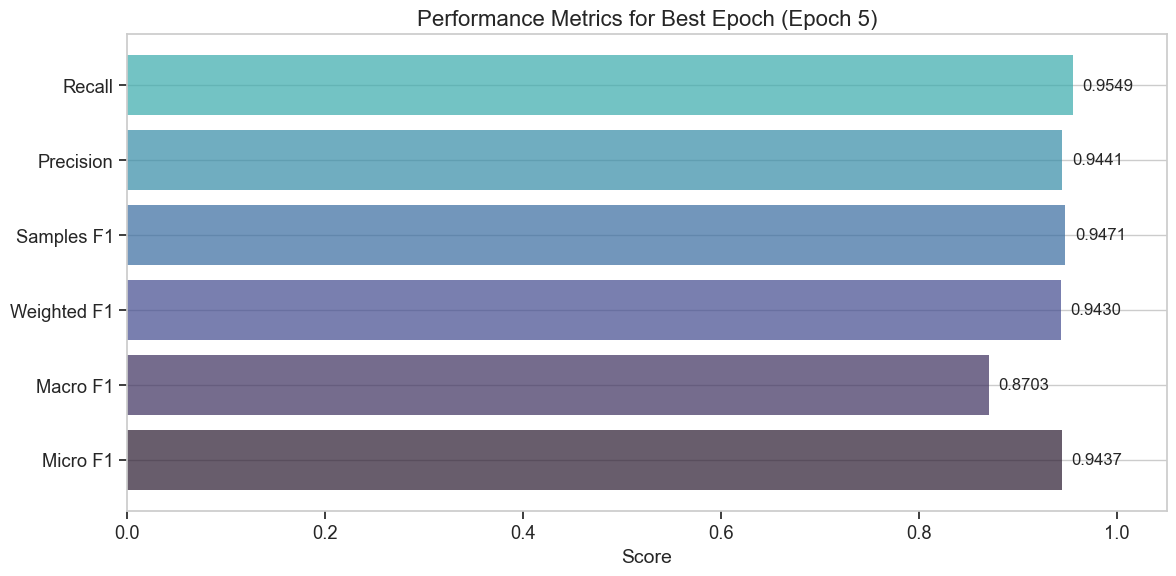

In [7]:
# Cell 7: Plot metrics summary for the best epoch
def plot_best_epoch_metrics():
    """Plot metrics for the best performing epoch"""
    # Get the best epoch (epoch 5 based on samples_f1)
    best_epoch_idx = np.argmax(manual_metrics[1]['samples_f1'])
    best_epoch = best_epoch_idx + 1
    
    # Extract metrics for the best epoch
    metrics = {
        'Micro F1': manual_metrics[1]['micro_f1'][best_epoch_idx],
        'Macro F1': manual_metrics[1]['macro_f1'][best_epoch_idx],
        'Weighted F1': manual_metrics[1]['weighted_f1'][best_epoch_idx],
        'Samples F1': manual_metrics[1]['samples_f1'][best_epoch_idx],
        'Precision': manual_metrics[1]['samples_precision'][best_epoch_idx],
        'Recall': manual_metrics[1]['samples_recall'][best_epoch_idx]
    }
    
    # Plot metrics as a horizontal bar chart
    plt.figure(figsize=(12, 6))
    bars = plt.barh(list(metrics.keys()), list(metrics.values()), color=colors[:6], alpha=0.7)
    
    # Add value labels
    for bar, value in zip(bars, metrics.values()):
        plt.text(value + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.4f}', 
                va='center', fontsize=12)
    
    plt.title(f'Performance Metrics for Best Epoch (Epoch {best_epoch})', fontsize=16)
    plt.xlabel('Score', fontsize=14)
    plt.xlim(0, 1.05)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

# Plot best epoch metrics
plot_best_epoch_metrics()

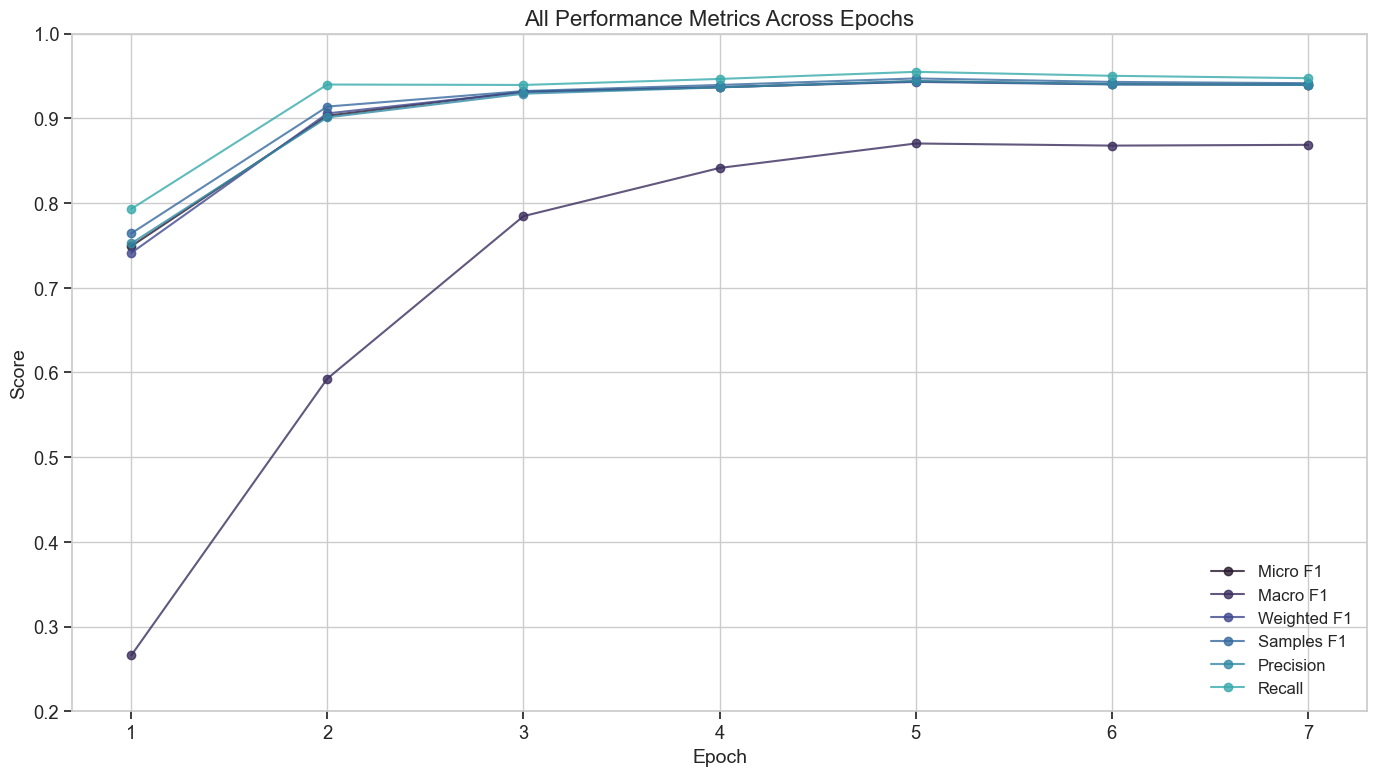

In [8]:
# Cell 8: Plot performance across all metrics
def plot_all_metrics_together():
    """Plot all metrics together for comparison"""
    metrics = ['micro_f1', 'macro_f1', 'weighted_f1', 'samples_f1', 
               'samples_precision', 'samples_recall']
    metric_names = ['Micro F1', 'Macro F1', 'Weighted F1', 'Samples F1', 
                    'Precision', 'Recall']
    
    plt.figure(figsize=(14, 8))
    
    for i, (metric, name) in enumerate(zip(metrics, metric_names)):
        epochs = range(1, len(manual_metrics[1][metric]) + 1)
        plt.plot(epochs, manual_metrics[1][metric], 'o-', label=name, color=colors[i], alpha=0.8)
    
    plt.title('All Performance Metrics Across Epochs', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.ylim(0.2, 1.0)
    plt.xticks(range(1, 8))
    plt.tight_layout()
    plt.show()

# Plot all metrics together
plot_all_metrics_together()

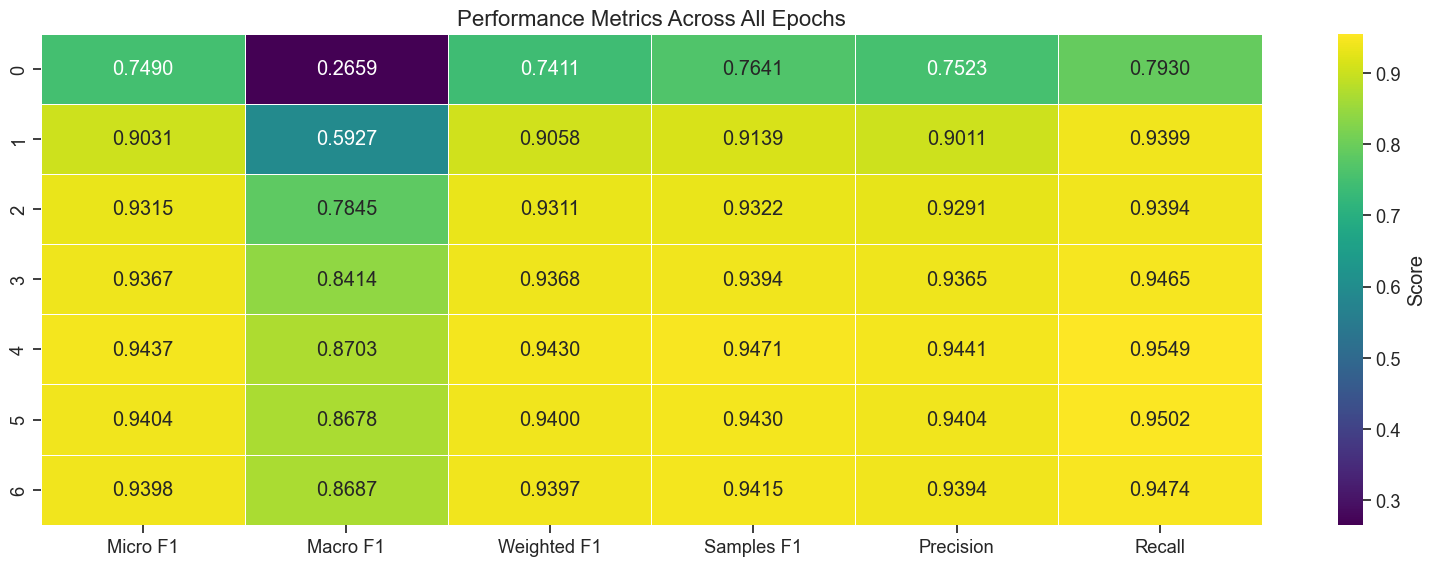

## Performance Summary

| Epoch | Train Loss | Val Loss | Micro F1 | Macro F1 | Weighted F1 | Samples F1 | Precision | Recall |
|-------|------------|----------|----------|----------|-------------|------------|-----------|--------|
| 1 | 0.4827 | 0.2680 | 0.7490 | 0.2659 | 0.7411 | 0.7641 | 0.7523 | 0.7930 |
| 2 | 0.1764 | 0.1008 | 0.9031 | 0.5927 | 0.9058 | 0.9139 | 0.9011 | 0.9399 |
| 3 | 0.1036 | 0.0848 | 0.9315 | 0.7845 | 0.9311 | 0.9322 | 0.9291 | 0.9394 |
| 4 | 0.0790 | 0.0750 | 0.9367 | 0.8414 | 0.9368 | 0.9394 | 0.9365 | 0.9465 |
| **5** | 0.0655 | 0.0792 | 0.9437 | 0.8703 | 0.9430 | 0.9471 | 0.9441 | 0.9549 |
| 6 | 0.0614 | 0.0723 | 0.9404 | 0.8678 | 0.9400 | 0.9430 | 0.9404 | 0.9502 |
| 7 | 0.0544 | 0.0698 | 0.9398 | 0.8687 | 0.9397 | 0.9415 | 0.9394 | 0.9474 |

Best epoch: 5 with Samples F1 score: 0.9471


In [9]:
# Cell 9: Performance summary table
def create_performance_summary():
    """Create a summary table of performance metrics"""
    # Extract metrics from all epochs
    epochs = range(1, 8)
    summary_data = []
    
    for epoch in epochs:
        idx = epoch - 1
        epoch_data = {
            'Epoch': epoch,
            'Training Loss': manual_metrics[1]['train_loss'][idx],
            'Validation Loss': manual_metrics[1]['loss'][idx],
            'Micro F1': manual_metrics[1]['micro_f1'][idx],
            'Macro F1': manual_metrics[1]['macro_f1'][idx],
            'Weighted F1': manual_metrics[1]['weighted_f1'][idx],
            'Samples F1': manual_metrics[1]['samples_f1'][idx],
            'Precision': manual_metrics[1]['samples_precision'][idx],
            'Recall': manual_metrics[1]['samples_recall'][idx]
        }
        summary_data.append(epoch_data)
    
    # Create DataFrame
    summary_df = pd.DataFrame(summary_data)
    
    # Highlight the best epoch (max samples F1)
    best_epoch_idx = np.argmax(manual_metrics[1]['samples_f1'])
    
    # Create a styled table
    plt.figure(figsize=(16, len(summary_df) * 0.7 + 1))
    
    # Create a heatmap-style table for metrics (excluding Epoch column)
    metrics_cols = ['Micro F1', 'Macro F1', 'Weighted F1', 'Samples F1', 'Precision', 'Recall']
    sns.heatmap(summary_df[metrics_cols], annot=True, cmap='viridis', fmt='.4f', 
                linewidths=0.5, cbar_kws={'label': 'Score'})
    
    plt.title('Performance Metrics Across All Epochs', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Print a formatted markdown table
    print("## Performance Summary")
    print("\n| Epoch | Train Loss | Val Loss | Micro F1 | Macro F1 | Weighted F1 | Samples F1 | Precision | Recall |")
    print("|-------|------------|----------|----------|----------|-------------|------------|-----------|--------|")
    
    for epoch in epochs:
        idx = epoch - 1
        highlight = "**" if idx == best_epoch_idx else ""
        print(f"| {highlight}{epoch}{highlight} | {manual_metrics[1]['train_loss'][idx]:.4f} | {manual_metrics[1]['loss'][idx]:.4f} | {manual_metrics[1]['micro_f1'][idx]:.4f} | {manual_metrics[1]['macro_f1'][idx]:.4f} | {manual_metrics[1]['weighted_f1'][idx]:.4f} | {manual_metrics[1]['samples_f1'][idx]:.4f} | {manual_metrics[1]['samples_precision'][idx]:.4f} | {manual_metrics[1]['samples_recall'][idx]:.4f} |")
    
    print(f"\nBest epoch: {best_epoch_idx + 1} with Samples F1 score: {manual_metrics[1]['samples_f1'][best_epoch_idx]:.4f}")

# Create performance summary
create_performance_summary()